# Natural product classification from BGCs

Apply the trained model to classify natural products from BGCs, based on [Walkter & Clardy, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.0c01304).

Briefly, Allison S. Walker and Jon Clardy present an innovative method combining machine learning and bioinformatics to predict the biological activities of natural products from their biosynthetic gene clusters (BGCs). This approach fills a critical gap in current bioinformatics capabilities, enabling the prediction of bioactivities like antibiotic and antifungal properties with up to 80% accuracy. Utilizing a dataset of known BGCs, the authors trained machine learning models, including random forests and support vector machines, to identify specific biosynthetic enzymes and molecular features associated with bioactivity. This method, which showed balanced accuracies between 57% to 80% in various tests, represents a significant advancement in natural product research and holds promise for accelerating the discovery of new antibiotics and therapeutic agents.

__NOTES__: 

1) The original Dockerfile was modified since it was not working properly.
2) The model takes two inputs, the AntiMASH 5 output gbk file, and the RGI output txt file
3) The model has to be run for every pair of input files.

## Flatten input directories

The input directories should be structured as follows:

```
input/
├── antimash
│   ├── 1.gbk
│   ├── 2.gbk
│   ├── 3.gbk

└── rgi
    ├── 1.txt
    ├── 2.txt
    ├── 3.txt
```

In [2]:
from pathlib import Path
from src.helper_functions import flatten_input_directory

antiSMASH_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/galapagos_antismash_export")
rgi_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/galapagos_rgi")
antiMASH_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/antiSMASH_output")
rgi_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/RGI_output")

flatten_input_directory(antiSMASH_nested_dir, antiMASH_output, ".gbk")
flatten_input_directory(rgi_nested_dir, rgi_output, ".txt")

In [4]:
antiSMASH_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/sola_antismash_export")
rgi_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/sola_rgi")
antiMASH_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/antiSMASH_output")
rgi_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/RGI_output")

flatten_input_directory(antiSMASH_nested_dir, antiMASH_output, ".gbk")
flatten_input_directory(rgi_nested_dir, rgi_output, ".txt")

## Run docker

In [1]:
%%bash 

work_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/Natural-product-function"
input_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola"
output_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/classified_bgcs"

bash src/classify_products.sh \
    -w "$work_dir" \
    -i "$input_dir" \
    -o "$output_dir" >/dev/null

## Parse output files

In [7]:
from src.helper_functions import parse_activity_classifier_file

df = parse_activity_classifier_file('data/galapagos/classified_bgcs/SRR12042300__k127_6814.region001.txt')
df

,tree_classifier,logistic_regression_classifier,svm_classifier
antibacterial,0.463150,0.374236,0.231500
anti-gram_positive,0.412750,0.220604,0.196497
anti-gram_negative,0.000000,0.068592,0.071520
antifugnal_antitumor_cytotoxic,0.000000,0.236482,0.219115
antifungal,0.004475,0.161470,0.113403
antitumor_cytotoxic,0.006468,0.123110,0.069044


In [8]:
from src.helper_functions import compile_natural_product_data

results = compile_natural_product_data(
    'data/sola/classified_bgcs',
    'mean',

    classification_cutoff=0.6
    )
results.head()

,antibacterial,anti-gram_positive,anti-gram_negative,antifugnal_antitumor_cytotoxic,antifungal,antitumor_cytotoxic
ERR2604081__k119_229758.region001,0,0,0,0,0,0
ERR2604094__k119_51552.region001,0,0,0,0,0,0
ERR2604091__k119_74002.region001,0,0,0,0,0,0
ERR2604091__k119_145788.region001,0,0,0,0,0,0
ERR2604090__k119_31395.region001,0,0,0,0,0,0


## Plot results

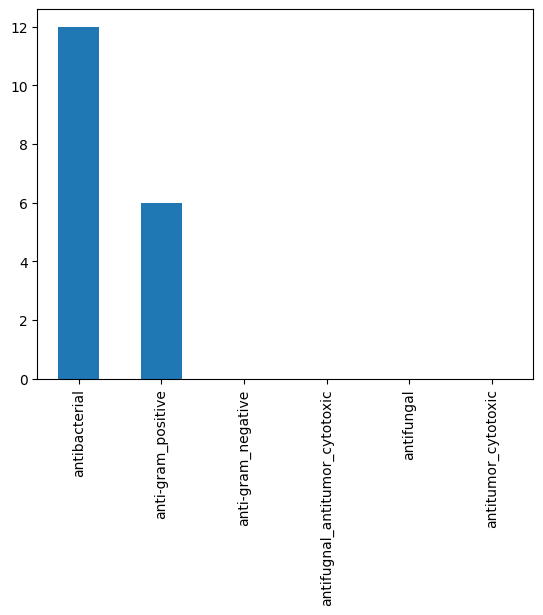

In [9]:
ax = results.sum(axis=0).sort_values(ascending=False).plot.bar()